In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
# from rake_nltk import Rake

## Data Preprocessing

#### Load Data

In [4]:
import pandas as pd
import os
os.chdir('C:/Users/MinJi/Documents')
df=pd.read_csv('tiktok_reviews.csv')
df.head(10)

Unnamed: 0.1  Unnamed: 0               names  \
0          9953        9953     Antony Muthanga   
1          3850        3850          Bella -San   
2          4962        4962     William Love Jr   
3          3886        3886                  PK   
4          5437        5437    Jannat ara Kajol   
5          8517        8517            R0KKUKEN   
6          2041        2041  Cyril Bezuidenhout   
7          1989        1989    Courtney Biggins   
8          1933        1933     Paul Chevallier   
9          9984        9984  johnstone macharia   

                                             reviews  ratings        date  
0  The app is great i love it coz i am meating my...        1    1-8-2023  
1  It's ok other than the drama(edit) girl. What ...        3   3-23-2023  
2  Since reviews are only important when there's ...        1  12-30-2022  
3  TikTok is able to keep your attention forever....        5  10-24-2022  
4  Ummmmmm.. Good but there is no save option so ...        4    3-1-2023  
5  It keeps telling me to "take a break your tapp...        1  10-22-2022  
6  It's really slow on my phone for some reason, ...        2   1-23-2023  
7  This app is amazing for so many reasons! The a...        5   3-24-2023  
8  no video that I post is going through and they...        1   2-12-2023  
9  While shooting my videos it's not perfect,it's...        1    2-9-2023

In [5]:
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

#### Clear texts: remove punctuations, transform texts into lowercases, remove extra whitespace

In [6]:
df['preprocessed reviews']=df['reviews'].str.lower().str.replace('[^\w\s]',' ',regex=True).str.replace(' +',' ', regex=True).str.strip()
## [^\w\s]: expressions that are non-words and non-space
df.head(10)

names                                            reviews  \
0     Antony Muthanga  The app is great i love it coz i am meating my...   
1          Bella -San  It's ok other than the drama(edit) girl. What ...   
2     William Love Jr  Since reviews are only important when there's ...   
3                  PK  TikTok is able to keep your attention forever....   
4    Jannat ara Kajol  Ummmmmm.. Good but there is no save option so ...   
5            R0KKUKEN  It keeps telling me to "take a break your tapp...   
6  Cyril Bezuidenhout  It's really slow on my phone for some reason, ...   
7    Courtney Biggins  This app is amazing for so many reasons! The a...   
8     Paul Chevallier  no video that I post is going through and they...   
9  johnstone macharia  While shooting my videos it's not perfect,it's...   

   ratings        date                               preprocessed reviews  
0        1    1-8-2023  the app is great i love it coz i am meating my...  
1        3   3-23-2023  it s ok other than the drama edit girl what ar...  
2        1  12-30-2022  since reviews are only important when there s ...  
3        5  10-24-2022  tiktok is able to keep your attention forever ...  
4        4    3-1-2023  ummmmmm good but there is no save option so i ...  
5        1  10-22-2022  it keeps telling me to take a break your tappi...  
6        2   1-23-2023  it s really slow on my phone for some reason b...  
7        5   3-24-2023  this app is amazing for so many reasons the al...  
8        1   2-12-2023  no video that i post is going through and they...  
9        1    2-9-2023  while shooting my videos it s not perfect it s...

In [7]:
df['preprocessed reviews'][0]

'the app is great i love it coz i am meating my childhood friends and i am communicating with them to me its great'

#### Tokenize string

In [8]:
#nltk.download('punkt')
df['preprocessed reviews']=df.apply(lambda row: nltk.word_tokenize(row[4]),axis=1)
## applies function to each row, not column : axis=1
df.head(10)

names                                            reviews  \
0     Antony Muthanga  The app is great i love it coz i am meating my...   
1          Bella -San  It's ok other than the drama(edit) girl. What ...   
2     William Love Jr  Since reviews are only important when there's ...   
3                  PK  TikTok is able to keep your attention forever....   
4    Jannat ara Kajol  Ummmmmm.. Good but there is no save option so ...   
5            R0KKUKEN  It keeps telling me to "take a break your tapp...   
6  Cyril Bezuidenhout  It's really slow on my phone for some reason, ...   
7    Courtney Biggins  This app is amazing for so many reasons! The a...   
8     Paul Chevallier  no video that I post is going through and they...   
9  johnstone macharia  While shooting my videos it's not perfect,it's...   

   ratings        date                               preprocessed reviews  
0        1    1-8-2023  [the, app, is, great, i, love, it, coz, i, am,...  
1        3   3-23-2023  [it, s, ok, other, than, the, drama, edit, gir...  
2        1  12-30-2022  [since, reviews, are, only, important, when, t...  
3        5  10-24-2022  [tiktok, is, able, to, keep, your, attention, ...  
4        4    3-1-2023  [ummmmmm, good, but, there, is, no, save, opti...  
5        1  10-22-2022  [it, keeps, telling, me, to, take, a, break, y...  
6        2   1-23-2023  [it, s, really, slow, on, my, phone, for, some...  
7        5   3-24-2023  [this, app, is, amazing, for, so, many, reason...  
8        1   2-12-2023  [no, video, that, i, post, is, going, through,...  
9        1    2-9-2023  [while, shooting, my, videos, it, s, not, perf...

#### Lemmatizer: transfrom English inflectional forms into their base forms

In [9]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')
lemmatizer=WordNetLemmatizer()
df['preprocessed reviews']=df['preprocessed reviews'].apply(lambda word_list: [lemmatizer.lemmatize(word) for word in word_list])
df.head(10)

names                                            reviews  \
0     Antony Muthanga  The app is great i love it coz i am meating my...   
1          Bella -San  It's ok other than the drama(edit) girl. What ...   
2     William Love Jr  Since reviews are only important when there's ...   
3                  PK  TikTok is able to keep your attention forever....   
4    Jannat ara Kajol  Ummmmmm.. Good but there is no save option so ...   
5            R0KKUKEN  It keeps telling me to "take a break your tapp...   
6  Cyril Bezuidenhout  It's really slow on my phone for some reason, ...   
7    Courtney Biggins  This app is amazing for so many reasons! The a...   
8     Paul Chevallier  no video that I post is going through and they...   
9  johnstone macharia  While shooting my videos it's not perfect,it's...   

   ratings        date                               preprocessed reviews  
0        1    1-8-2023  [the, app, is, great, i, love, it, coz, i, am,...  
1        3   3-23-2023  [it, s, ok, other, than, the, drama, edit, gir...  
2        1  12-30-2022  [since, review, are, only, important, when, th...  
3        5  10-24-2022  [tiktok, is, able, to, keep, your, attention, ...  
4        4    3-1-2023  [ummmmmm, good, but, there, is, no, save, opti...  
5        1  10-22-2022  [it, keep, telling, me, to, take, a, break, yo...  
6        2   1-23-2023  [it, s, really, slow, on, my, phone, for, some...  
7        5   3-24-2023  [this, app, is, amazing, for, so, many, reason...  
8        1   2-12-2023  [no, video, that, i, post, is, going, through,...  
9        1    2-9-2023  [while, shooting, my, video, it, s, not, perfe...

#### Wordcloud

In [10]:
from wordcloud import WordCloud

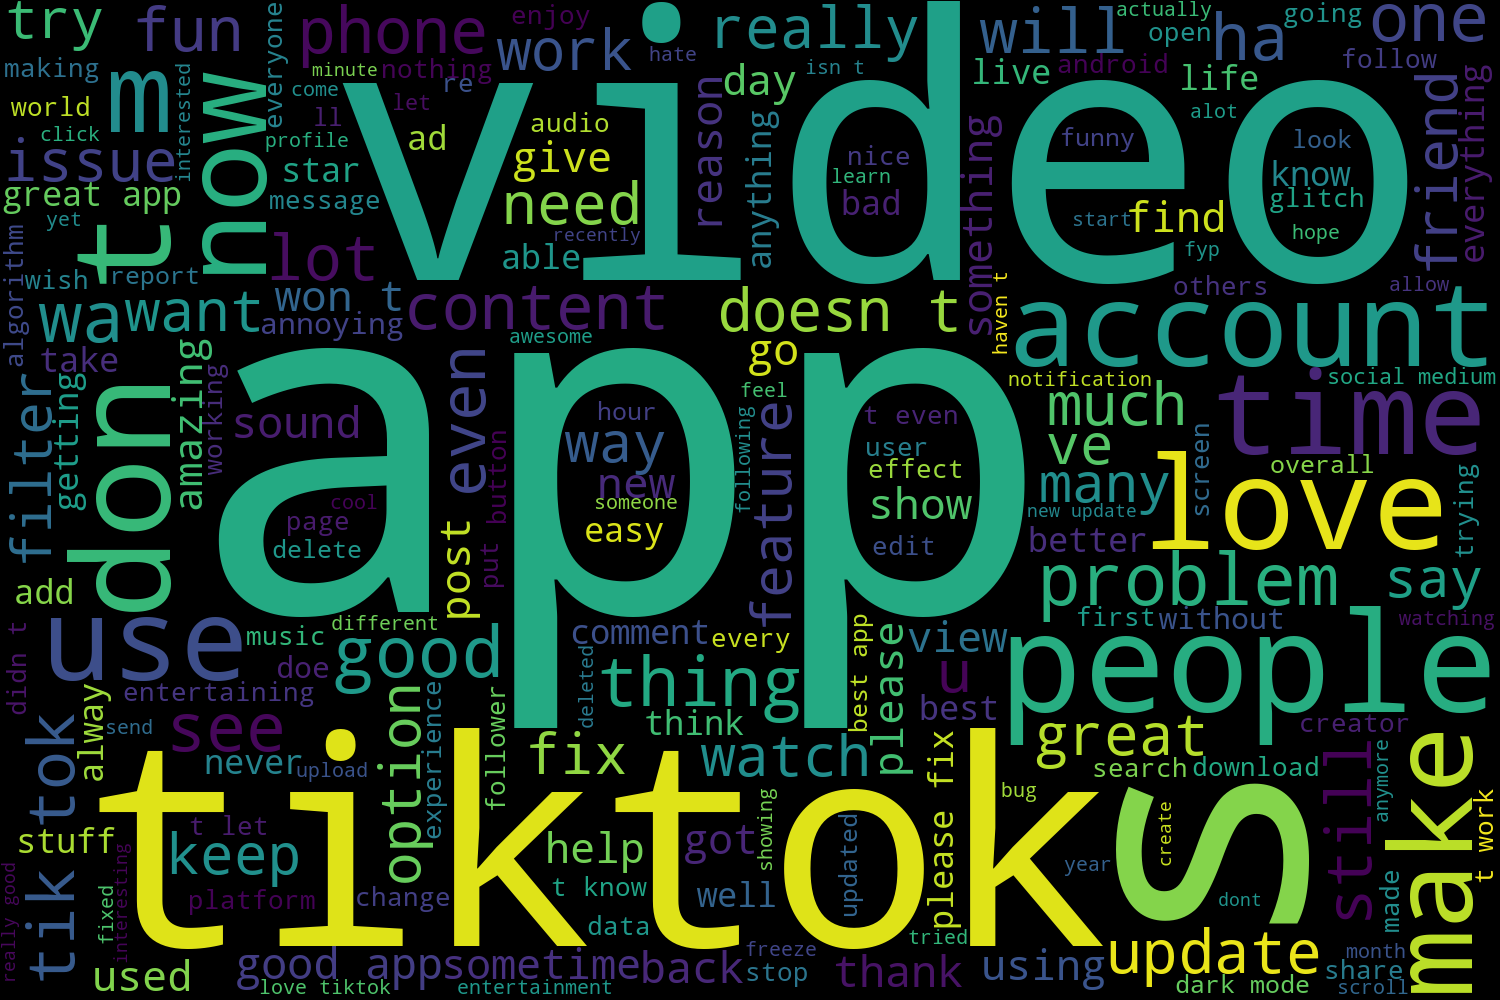

In [11]:
words=[]
for i in df['preprocessed reviews']:
    for j in i:
        words.append(j)
keywords=','.join(i for i in words)
wordcloud=WordCloud(width=1500,height=1000)

wordcloud.generate(keywords)
wordcloud.to_image()

#### Remove stopwords

In [12]:
# nltk.download('stopwords')
stop=stopwords.words('english')
stop.extend(['even','still','ha','u','really','literally','dont','please','doe','alway','lot','tiktok','tik','tok',
            'though','stuff','thing','alot','actually','wa','something','uh','ok','ummmmmm','app',
            '𝟙','𝚢𝚘𝚞','𝚢𝚘𝚞','𝚝𝚑𝚒𝚜','𝚜𝚒𝚌𝚔','𝚜','im','def'])
df['preprocessed reviews']=df['preprocessed reviews'].apply(lambda list: [word for word in list if word not in stop])

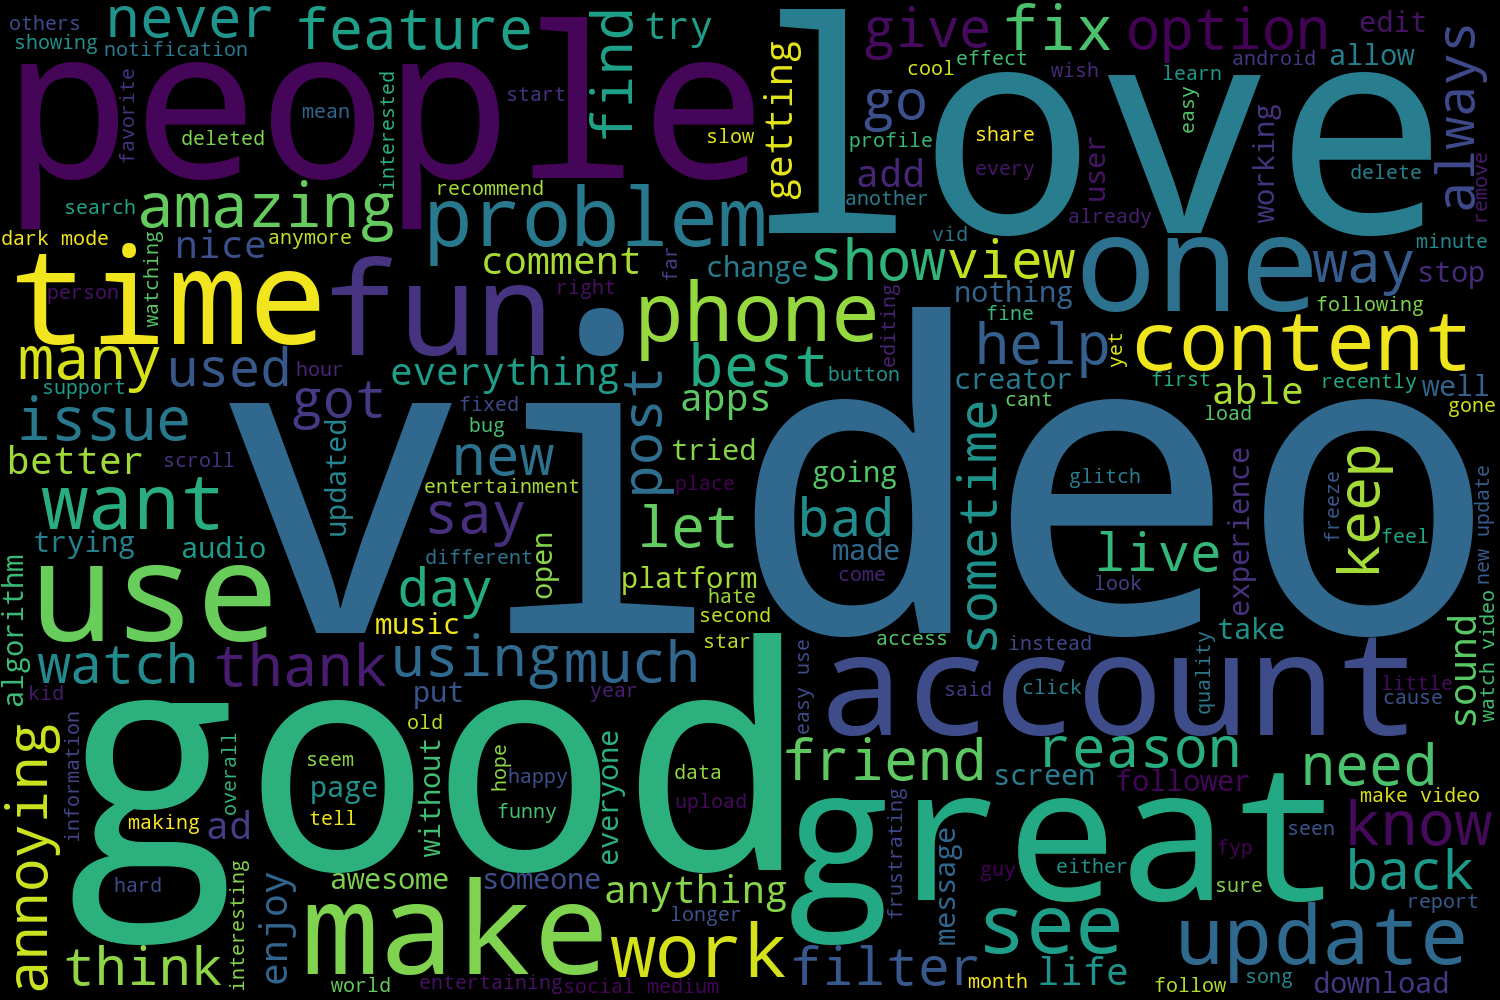

In [13]:
words=[] # list of words that appear in a document
for i in df['preprocessed reviews']:
    for j in i:
        words.append(j)
keywords=','.join(i for i in words)
wordcloud=WordCloud(width=1500,height=1000)

wordcloud.generate(keywords)
wordcloud.to_image()

In [14]:
df.head(10)

names                                            reviews  \
0     Antony Muthanga  The app is great i love it coz i am meating my...   
1          Bella -San  It's ok other than the drama(edit) girl. What ...   
2     William Love Jr  Since reviews are only important when there's ...   
3                  PK  TikTok is able to keep your attention forever....   
4    Jannat ara Kajol  Ummmmmm.. Good but there is no save option so ...   
5            R0KKUKEN  It keeps telling me to "take a break your tapp...   
6  Cyril Bezuidenhout  It's really slow on my phone for some reason, ...   
7    Courtney Biggins  This app is amazing for so many reasons! The a...   
8     Paul Chevallier  no video that I post is going through and they...   
9  johnstone macharia  While shooting my videos it's not perfect,it's...   

   ratings        date                               preprocessed reviews  
0        1    1-8-2023  [great, love, coz, meating, childhood, friend,...  
1        3   3-23-2023  [drama, edit, girl, talking, anywho, use, tikt...  
2        1  12-30-2022  [since, review, important, issue, several, wee...  
3        5  10-24-2022  [able, keep, attention, forever, perfectly, ca...  
4        4    3-1-2023  [good, save, option, go, google, many, link, s...  
5        1  10-22-2022  [keep, telling, take, break, tapping, fast, ta...  
6        2   1-23-2023  [slow, phone, reason, go, whatsapp, playstore,...  
7        5   3-24-2023  [amazing, many, reason, algorithm, impeccable,...  
8        1   2-12-2023  [video, post, going, hidden, love, making, vid...  
9        1    2-9-2023               [shooting, video, perfect, delaying]

In [15]:
import gensim.corpora as corpora

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# map each word in a document to a unique ID
dictionary=corpora.Dictionary([words])
print(dictionary.token2id)

In [ ]:
bag_of_words=dictionary.doc2bow(words)
bag_of_words # (id, frequency)

In [16]:
# extracted total 8482 rows
df=df[df['date'].str.contains('2023')]
df
# filtered 2023 reviews only (7169 rows)

names                                            reviews  \
0        Antony Muthanga  The app is great i love it coz i am meating my...   
1             Bella -San  It's ok other than the drama(edit) girl. What ...   
4       Jannat ara Kajol  Ummmmmm.. Good but there is no save option so ...   
6     Cyril Bezuidenhout  It's really slow on my phone for some reason, ...   
7       Courtney Biggins  This app is amazing for so many reasons! The a...   
...                  ...                                                ...   
8475            Marissah  This is my one app I would download first when...   
8478   Jalynne Wiedemann  This is the best app to cure your boredom with...   
8479        Sarah Ospina  One of those apps that changed the world! Grea...   
8480  SOHEL RANA (Sohel)        Easy to use the apps and more entertainment   
8481              Greg V  App won't open no matter how many times I've i...   

      ratings       date                               preprocessed reviews  
0           1   1-8-2023  [great, love, coz, meating, childhood, friend,...  
1           3  3-23-2023  [drama, edit, girl, talking, anywho, use, tikt...  
4           4   3-1-2023  [good, save, option, go, google, many, link, s...  
6           2  1-23-2023  [slow, phone, reason, go, whatsapp, playstore,...  
7           5  3-24-2023  [amazing, many, reason, algorithm, impeccable,...  
...       ...        ...                                                ...  
8475        5   1-6-2023  [one, would, download, first, would, get, new,...  
8478        5  1-16-2023  [best, cure, boredom, spend, hour, pas, time, ...  
8479        5  1-30-2023  [one, apps, changed, world, great, social, int...  
8480        5   3-2-2023                   [easy, use, apps, entertainment]  
8481        2  3-14-2023  [open, matter, many, time, installed, uninstal...  

[7169 rows x 5 columns]

In [17]:
# pip install python-rake==1.4.4
from RAKE import Rake
import operator

In [18]:
from rake_nltk import Rake

#### Topic Modeling

In [19]:
vectors=[]
for index, row in df.iterrows():
    vectors.append(", ".join(row[4]))
    
vectors

['great, love, coz, meating, childhood, friend, communicating, great',
 'drama, edit, girl, talking, anywho, use, tiktoks, audio, good',
 'good, save, option, go, google, many, link, save, video, without, watermark, enjoying',
 'slow, phone, reason, go, whatsapp, playstore, example, running, normal, speed, fix, gim, suggestion, thanks',
 'amazing, many, reason, algorithm, impeccable, love, definitely, recommend, friend',
 'video, post, going, hidden, love, making, video, let, work, reached, used, report, problem, function, absolutely, help, come, way, fix',
 'shooting, video, perfect, delaying',
 'made, new, account, profile, username, set, place, instantly, banned, suspended, banned, created, new, one, problem, occur, fix',
 'hi, team, issue, like, past, 6, hour, working, say, unstable, network, connection, apps, running, smoothly, also, redownloaded, vain, help, thanks',
 'good, entertaining, show, skill, make, video, excellent, load, guy',
 'rrly, like, load, say, load, video, try, 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(analyzer='word',ngram_range=(1,2))

vectorized=vectorizer.fit_transform(vectors)
print(vectorized)

  (0, 30485)	2
  (0, 40757)	1
  (0, 15145)	1
  (0, 42766)	1
  (0, 12028)	1
  (0, 26356)	1
  (0, 13194)	1
  (0, 30690)	1
  (0, 40844)	1
  (0, 15150)	1
  (0, 42767)	1
  (0, 12029)	1
  (0, 26391)	1
  (0, 13197)	1
  (1, 18880)	1
  (1, 19391)	1
  (1, 28554)	1
  (1, 66064)	1
  (1, 5541)	1
  (1, 71675)	1
  (1, 67618)	1
  (1, 6526)	1
  (1, 29595)	1
  (1, 18882)	1
  (1, 19429)	1
  :	:
  (7166, 5937)	1
  (7166, 11704)	1
  (7166, 35000)	1
  (7166, 6963)	1
  (7166, 14214)	1
  (7166, 34508)	1
  (7166, 75537)	1
  (7167, 71675)	1
  (7167, 5921)	1
  (7167, 19260)	1
  (7167, 19342)	1
  (7167, 20881)	1
  (7167, 5961)	1
  (7167, 71707)	1
  (7168, 42169)	1
  (7168, 34766)	1
  (7168, 67737)	1
  (7168, 70517)	1
  (7168, 42482)	1
  (7168, 47791)	1
  (7168, 42499)	1
  (7168, 42337)	1
  (7168, 67963)	1
  (7168, 47862)	1
  (7168, 34807)	1


In [21]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model=LatentDirichletAllocation(n_components=10,
                                   random_state=10,
                                   evaluate_every=-1,
                                   n_jobs=-1)

lda_output=lda_model.fit_transform(vectorized)

topics=["Topic"+str(i) for i in range(1,lda_model.n_components+1)]

df_topic=pd.DataFrame(np.round(lda_output,2), columns=topics)
main_topic=np.argmax(df_topic.values,axis=1)+1

df_topic['Main Topic of the Document']=main_topic

df_topic

Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  Topic8  Topic9  \
0       0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.94   
1       0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.95   
2       0.00    0.00    0.00    0.00    0.96    0.00    0.00    0.00    0.00   
3       0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.97   
4       0.95    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7164    0.00    0.00    0.97    0.00    0.00    0.00    0.00    0.00    0.00   
7165    0.00    0.00    0.00    0.97    0.00    0.00    0.00    0.00    0.00   
7166    0.00    0.00    0.00    0.00    0.96    0.00    0.00    0.00    0.00   
7167    0.01    0.01    0.01    0.89    0.01    0.01    0.01    0.01    0.01   
7168    0.01    0.01    0.92    0.01    0.01    0.01    0.01    0.01    0.01   

      Topic10  Main Topic of the Document  
0        0.01                           9  
1        0.01                           9  
2        0.00                           5  
3        0.00                           9  
4        0.01                           1  
...       ...                         ...  
7164     0.00                           3  
7165     0.00                           4  
7166     0.00                           5  
7167     0.01                           4  
7168     0.01                           3  

[7169 rows x 11 columns]

In [22]:
new_df=pd.merge(df['reviews'],df['preprocessed reviews'],left_index=True,right_index=True,how='outer')

index=[]
for i in range(7169):
    index.append(i)

new_df['index']=index
new_df.set_index('index', inplace=True)

new_df=pd.merge(new_df,df_topic,left_index=True, right_index=True,how='outer')
    
new_df

reviews  \
index                                                      
0      The app is great i love it coz i am meating my...   
1      It's ok other than the drama(edit) girl. What ...   
2      Ummmmmm.. Good but there is no save option so ...   
3      It's really slow on my phone for some reason, ...   
4      This app is amazing for so many reasons! The a...   
...                                                  ...   
7164   This is my one app I would download first when...   
7165   This is the best app to cure your boredom with...   
7166   One of those apps that changed the world! Grea...   
7167         Easy to use the apps and more entertainment   
7168   App won't open no matter how many times I've i...   

                                    preprocessed reviews  Topic1  Topic2  \
index                                                                      
0      [great, love, coz, meating, childhood, friend,...    0.01    0.01   
1      [drama, edit, girl, talking, anywho, use, tikt...    0.01    0.01   
2      [good, save, option, go, google, many, link, s...    0.00    0.00   
3      [slow, phone, reason, go, whatsapp, playstore,...    0.00    0.00   
4      [amazing, many, reason, algorithm, impeccable,...    0.95    0.01   
...                                                  ...     ...     ...   
7164   [one, would, download, first, would, get, new,...    0.00    0.00   
7165   [best, cure, boredom, spend, hour, pas, time, ...    0.00    0.00   
7166   [one, apps, changed, world, great, social, int...    0.00    0.00   
7167                    [easy, use, apps, entertainment]    0.01    0.01   
7168   [open, matter, many, time, installed, uninstal...    0.01    0.01   

       Topic3  Topic4  Topic5  Topic6  Topic7  Topic8  Topic9  Topic10  \
index                                                                    
0        0.01    0.01    0.01    0.01    0.01    0.01    0.94     0.01   
1        0.01    0.01    0.01    0.01    0.01    0.01    0.95     0.01   
2        0.00    0.00    0.96    0.00    0.00    0.00    0.00     0.00   
3        0.00    0.00    0.00    0.00    0.00    0.00    0.97     0.00   
4        0.01    0.01    0.01    0.01    0.01    0.01    0.01     0.01   
...       ...     ...     ...     ...     ...     ...     ...      ...   
7164     0.97    0.00    0.00    0.00    0.00    0.00    0.00     0.00   
7165     0.00    0.97    0.00    0.00    0.00    0.00    0.00     0.00   
7166     0.00    0.00    0.96    0.00    0.00    0.00    0.00     0.00   
7167     0.01    0.89    0.01    0.01    0.01    0.01    0.01     0.01   
7168     0.92    0.01    0.01    0.01    0.01    0.01    0.01     0.01   

       Main Topic of the Document  
index                              
0                               9  
1                               9  
2                               5  
3                               9  
4                               1  
...                           ...  
7164                            3  
7165                            4  
7166                            5  
7167                            4  
7168                            3  

[7169 rows x 13 columns]

In [23]:
df.reset_index(inplace=True)
final=pd.merge(df['ratings'],new_df,left_index=True,right_index=True)
final

ratings                                            reviews  \
0           1  The app is great i love it coz i am meating my...   
1           3  It's ok other than the drama(edit) girl. What ...   
2           4  Ummmmmm.. Good but there is no save option so ...   
3           2  It's really slow on my phone for some reason, ...   
4           5  This app is amazing for so many reasons! The a...   
...       ...                                                ...   
7164        5  This is my one app I would download first when...   
7165        5  This is the best app to cure your boredom with...   
7166        5  One of those apps that changed the world! Grea...   
7167        5        Easy to use the apps and more entertainment   
7168        2  App won't open no matter how many times I've i...   

                                   preprocessed reviews  Topic1  Topic2  \
0     [great, love, coz, meating, childhood, friend,...    0.01    0.01   
1     [drama, edit, girl, talking, anywho, use, tikt...    0.01    0.01   
2     [good, save, option, go, google, many, link, s...    0.00    0.00   
3     [slow, phone, reason, go, whatsapp, playstore,...    0.00    0.00   
4     [amazing, many, reason, algorithm, impeccable,...    0.95    0.01   
...                                                 ...     ...     ...   
7164  [one, would, download, first, would, get, new,...    0.00    0.00   
7165  [best, cure, boredom, spend, hour, pas, time, ...    0.00    0.00   
7166  [one, apps, changed, world, great, social, int...    0.00    0.00   
7167                   [easy, use, apps, entertainment]    0.01    0.01   
7168  [open, matter, many, time, installed, uninstal...    0.01    0.01   

      Topic3  Topic4  Topic5  Topic6  Topic7  Topic8  Topic9  Topic10  \
0       0.01    0.01    0.01    0.01    0.01    0.01    0.94     0.01   
1       0.01    0.01    0.01    0.01    0.01    0.01    0.95     0.01   
2       0.00    0.00    0.96    0.00    0.00    0.00    0.00     0.00   
3       0.00    0.00    0.00    0.00    0.00    0.00    0.97     0.00   
4       0.01    0.01    0.01    0.01    0.01    0.01    0.01     0.01   
...      ...     ...     ...     ...     ...     ...     ...      ...   
7164    0.97    0.00    0.00    0.00    0.00    0.00    0.00     0.00   
7165    0.00    0.97    0.00    0.00    0.00    0.00    0.00     0.00   
7166    0.00    0.00    0.96    0.00    0.00    0.00    0.00     0.00   
7167    0.01    0.89    0.01    0.01    0.01    0.01    0.01     0.01   
7168    0.92    0.01    0.01    0.01    0.01    0.01    0.01     0.01   

      Main Topic of the Document  
0                              9  
1                              9  
2                              5  
3                              9  
4                              1  
...                          ...  
7164                           3  
7165                           4  
7166                           5  
7167                           4  
7168                           3  

[7169 rows x 14 columns]

#### What are the topics?

In [24]:
keyword_in_topic=np.array(vectorizer.get_feature_names_out()) # keywords name

topic_keywords=[]

# lda_model.components_ : topic-word probability 

for probability in lda_model.components_:
    keywords_array=(-probability).argsort()[:50] # sort the topic weights in descending order (returns array in indices)
    topic_keywords.append(keyword_in_topic.take(keywords_array))
    
for topic in topic_keywords:
    print(topic)

['video' 'account' 'like' 'get' 'mode' 'dark' 'dark mode' 'good' 'people'
 'love' 'make' 'follow' 'use' 'time' 'would' 'new' 'work' 'one' 'fix'
 'many' 'android' 'let' 'content' 'say' 'know' 'problem' 'great' 'friend'
 'also' 'reason' 'show' 'user' 'keep' 'phone' 'back' 'fun' 'go' 'open'
 'annoying' 'option' 'give' 'view' 'search' 'help' 'using' 'easy' 'watch'
 'way' 'mode android' 'anything']
['like' 'video' 'love' 'people' 'time' 'good' 'get' 'amazing' 'much'
 'would' 'problem' 'make' 'give' 'keep' 'account' 'great' 'see' 'watch'
 'go' 'use' 'work' 'want' 'best' 'one' 'ad' 'fix' 'post' 'new' 'content'
 'many' 'also' 'fun' 'world' 'star' 'back' 'let' 'show' 'day' 'never'
 'follow' 'try' 'know' 'sometimes' 'recommend' 'think' 'easy' 'experience'
 'phone' 'nice' 'watching']
['like' 'video' 'get' 'one' 'make' 'people' 'love' 'account' 'new'
 'problem' 'great' 'good' 'time' 'use' 'content' 'many' 'see' 'live' 'fun'
 'friend' 'much' 'star' 'update' 'would' 'phone' 'also' 'option' 'go'
 'ke

In [25]:
df_topic_keywords=pd.DataFrame(topic_keywords)
df_topic_keywords['Topic_Keywords']=df_topic_keywords.values.tolist()
df_topic_keywords['Topic_Number']=df_topic_keywords.index+1
df_topic_keywords=df_topic_keywords[['Topic_Keywords','Topic_Number']]
df_topic_keywords

Topic_Keywords  Topic_Number
0  [video, account, like, get, mode, dark, dark m...             1
1  [like, video, love, people, time, good, get, a...             2
2  [like, video, get, one, make, people, love, ac...             3
3  [video, time, love, get, use, good, like, phon...             4
4  [video, people, use, time, like, get, good, ma...             5
5  [video, get, time, good, best, love, like, pro...             6
6  [video, like, love, good, account, problem, pe...             7
7  [video, great, update, good, keep, fun, people...             8
8  [good, video, like, people, get, great, love, ...             9
9  [video, like, good, get, people, time, fun, ma...            10

In [26]:
df_with_topic_keywords=pd.merge(final,df_topic_keywords,left_on='Main Topic of the Document',right_on='Topic_Number')
del df_with_topic_keywords['Topic_Number']

df_with_topic_keywords

ratings                                            reviews  \
0           1  The app is great i love it coz i am meating my...   
1           3  It's ok other than the drama(edit) girl. What ...   
2           2  It's really slow on my phone for some reason, ...   
3           5  Hi tik tok team i have a issue with your app i...   
4           5  Very good for you're imagination and if u are ...   
...       ...                                                ...   
7164        5  I like this app very easy to use and make vide...   
7165        3  It's a great app but I'm not liking the new up...   
7166        1  They censor and control as much as they can. S...   
7167        5  This is my one app I would download first when...   
7168        2  App won't open no matter how many times I've i...   

                                   preprocessed reviews  Topic1  Topic2  \
0     [great, love, coz, meating, childhood, friend,...    0.01    0.01   
1     [drama, edit, girl, talking, anywho, use, tikt...    0.01    0.01   
2     [slow, phone, reason, go, whatsapp, playstore,...    0.00    0.00   
3     [hi, team, issue, like, past, 6, hour, working...    0.00    0.00   
4     [good, imagination, bored, watch, load, cool, ...    0.01    0.01   
...                                                 ...     ...     ...   
7164  [like, easy, use, make, video, full, support, ...    0.01    0.01   
7165  [great, liking, new, update, hold, person, nam...    0.00    0.00   
7166  [censor, control, much, sux, one, game, town, ...    0.01    0.01   
7167  [one, would, download, first, would, get, new,...    0.00    0.00   
7168  [open, matter, many, time, installed, uninstal...    0.01    0.01   

      Topic3  Topic4  Topic5  Topic6  Topic7  Topic8  Topic9  Topic10  \
0       0.01    0.01    0.01    0.01    0.01    0.01    0.94     0.01   
1       0.01    0.01    0.01    0.01    0.01    0.01    0.95     0.01   
2       0.00    0.00    0.00    0.00    0.00    0.00    0.97     0.00   
3       0.00    0.00    0.00    0.00    0.00    0.00    0.98     0.00   
4       0.01    0.01    0.01    0.01    0.01    0.01    0.94     0.01   
...      ...     ...     ...     ...     ...     ...     ...      ...   
7164    0.94    0.01    0.01    0.01    0.01    0.01    0.01     0.01   
7165    0.98    0.00    0.00    0.00    0.00    0.00    0.00     0.00   
7166    0.95    0.01    0.01    0.01    0.01    0.01    0.01     0.01   
7167    0.97    0.00    0.00    0.00    0.00    0.00    0.00     0.00   
7168    0.92    0.01    0.01    0.01    0.01    0.01    0.01     0.01   

      Main Topic of the Document  \
0                              9   
1                              9   
2                              9   
3                              9   
4                              9   
...                          ...   
7164                           3   
7165                           3   
7166                           3   
7167                           3   
7168                           3   

                                         Topic_Keywords  
0     [good, video, like, people, get, great, love, ...  
1     [good, video, like, people, get, great, love, ...  
2     [good, video, like, people, get, great, love, ...  
3     [good, video, like, people, get, great, love, ...  
4     [good, video, like, people, get, great, love, ...  
...                                                 ...  
7164  [like, video, get, one, make, people, love, ac...  
7165  [like, video, get, one, make, people, love, ac...  
7166  [like, video, get, one, make, people, love, ac...  
7167  [like, video, get, one, make, people, love, ac...  
7168  [like, video, get, one, make, people, love, ac...  

[7169 rows x 15 columns]

In [27]:
all=[]
for i in df_with_topic_keywords['Main Topic of the Document'].unique():
    topic=df_with_topic_keywords[df_with_topic_keywords['Main Topic of the Document']==i]
    topic=topic.copy() # no modification on actual df_with_topic_keywords
    
    keyphrases=[]
    
    topic['reviews']=topic['reviews'].str.lower().str.replace('[^\w\s]', ' ',regex=True).str.replace(' +', ' ',regex=True).str.strip()
    
    for j in topic['reviews'].values.tolist():
        r=Rake()
        keyword=r.extract_keywords_from_text(j)
        keyphrase=r.get_ranked_phrases_with_scores()
        
        for phrase in keyphrase:
            if phrase not in keyphrases:
                keyphrases.append(phrase)
                
    keyphrases=pd.DataFrame(keyphrases, columns=['score','key_phrases'])
    keyphrases=keyphrases.sort_values('score',ascending=False)
    keyphrases = keyphrases.drop_duplicates(subset=['key_phrases'])
    keyphrases['Topic_Number']=i
    keyphrases['key_phrases_list']=keyphrases.key_phrases.apply(lambda x: x.split())
    
    bigrams_key=[]
    
    for j in keyphrases.values.tolist():
        key=[]
        bigrams=ngrams(j[3],2)

        for phrase in bigrams:
            key.append(' '.join(phrase))
            
        for word in j[3]:
            key.append(word)
            key.append(lemmatizer.lemmatize(word))
            
        j.remove(j[3])
        j.append(list(set(key)))
        bigrams_key.append(j)
        
    keyphrases=pd.DataFrame(bigrams_key, columns=['score','key_phrases','topic_number','key_phrases_list'])
    # keyphrases df -> key_phrases_list: key words + phrases extracted by RAKE
    
    # df_with_topic_keywords -> CounterVectorizer function
    
    topic_keywords=df_with_topic_keywords['Topic_Keywords'].values.tolist()
    topic_keywords=[item for sublist in topic_keywords for item in sublist]
    topic_keywords=list(set(topic_keywords))
    
    tmp=[]
    
    for key in topic_keywords:
        in_rake=keyphrases.key_phrases_list.apply(lambda x: key in x)
        inrake_keyphrases=keyphrases[in_rake]
                
        if inrake_keyphrases.empty:
            pass
        else:
            for j in inrake_keyphrases[['score','key_phrases','topic_number']].values.tolist():
                if j not in tmp:
                    tmp.append(j)
    
    keyphrases=pd.DataFrame(tmp, columns=['score','key_phrases','topic_number'])
    
    # topic title
    top_key_words=keyphrases[keyphrases.score==keyphrases['score'].max()]
    
    # child terms of a topic title
    child_keywords=keyphrases[keyphrases.score!=keyphrases['score'].max()]
    
    top_key_words=top_key_words.copy()
    top_key_words=top_key_words.groupby(['score','topic_number']).agg({'key_phrases': lambda x: ' /'.join(map(str,x))})
    top_key_words = top_key_words.reset_index()
    top_key_words['parent']=''
    
    child_keywords=child_keywords.copy()
    child_keywords['topic_number']=child_keywords['topic_number']+0.1 # for indication
    child_keywords['parent']=top_key_words['key_phrases'].values.tolist()[0]

    all_topic=pd.concat([top_key_words,child_keywords],sort=False)
    
    for topic in all_topic.to_dict(orient='records'):
        all.append(topic)
        
all_df=pd.DataFrame(all)
all_df=all_df.sort_values('topic_number',ascending=True)
all_df=all_df.loc[all_df['score']>50.0]

all_df

score  topic_number  \
3751   158.166667           1.0   
4915    87.500000           1.1   
4058    64.000000           1.1   
3936    81.000000           1.1   
4097   125.666667           1.1   
...           ...           ...   
16242   64.000000          10.1   
15658   64.000000          10.1   
15702   77.500000          10.1   
17018   60.500000          10.1   
16723   81.000000          10.1   

                                             key_phrases  \
3751   bias regional branches management slow traffic...   
4915   posted video aboutfreefire named game update a...   
4058   chinese glitter like plastic lol dolls nothing...   
3936   app samsung galaxy note 20 ultra android versi...   
4097   tik tok thanks video upload hd option onfor ex...   
...                                                  ...   
16242  actually get views likes follows organically w...   
15658     things like new languages good social ways try   
15702  app short videos enterten every time tiktok ap...   
17018  community guidelines either support team wont ...   
16723  beta cleared cache cleared data uninstalled re...   

                                                  parent  
3751                                                      
4915   bias regional branches management slow traffic...  
4058   bias regional branches management slow traffic...  
3936   bias regional branches management slow traffic...  
4097   bias regional branches management slow traffic...  
...                                                  ...  
16242  new updates cause severe lagging issues major ...  
15658  new updates cause severe lagging issues major ...  
15702  new updates cause severe lagging issues major ...  
17018  new updates cause severe lagging issues major ...  
16723  new updates cause severe lagging issues major ...  

[106 rows x 4 columns]

In [28]:
import plotly.graph_objects as graph

fig=graph.Figure(graph.Sunburst(
    labels=all_df['key_phrases'].values.tolist(),
    parents=all_df['parent'].values.tolist(),
    values=all_df['score'].values.tolist()
))

fig.show()

#### Feature specific DF

In [29]:
features_row=[]
for index, row in new_df.iterrows():
    if 'feature' in row[0] or 'features' in row[0]:
        features_row.append(row.values.tolist())

review_about_features=[]
for i in features_row:
    review_about_features.append(i[0])
    
features_df=pd.DataFrame(review_about_features,columns=['reviews'])
features_df
        
# make a new df with the reviews that explicitly talk about features of an app

reviews
0    This app is so advanced and has more features ...
1    They got rid of the discovery feature, which l...
2    Whenever there's a new update it removes the a...
3    It's a very heavy wonderful app but it has som...
4    They have removed the most basic but useful fe...
..                                                 ...
247  It's a good app very fun but the updates seem ...
248  I love the experience but I feel that it has f...
249  App is very good and entertaining but please f...
250  App works great and I enjoy using it a lot. I ...
251  Some features like AI portrait feature doesn't...

[252 rows x 1 columns]

In [30]:
features_df['preprocessed reviews']=features_df['reviews'].str.lower().str.replace('[^\w\s]',' ',regex=True).str.replace(' +',' ', regex=True).str.strip()
features_df['preprocessed reviews']=features_df['preprocessed reviews'].apply(lambda x: nltk.word_tokenize(x))
features_df['reviews'][1]

'They got rid of the discovery feature, which lets you find Percific videos and replace it with a friend feature that nobody uses'

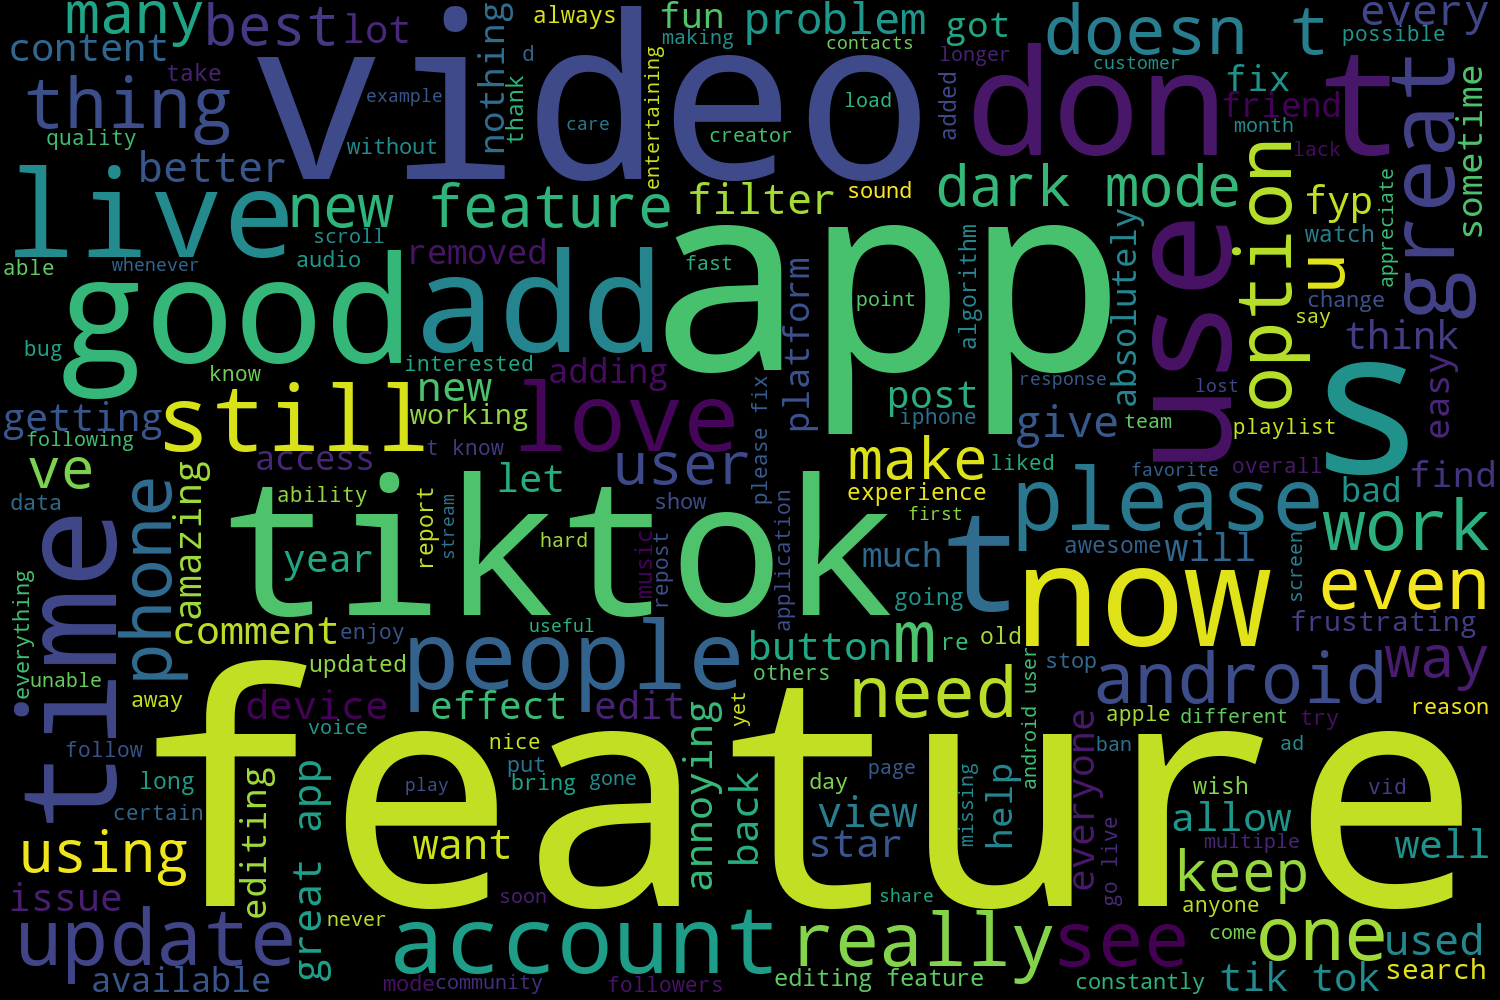

In [31]:
words=[]
for i in features_df['preprocessed reviews']:
    for j in i:
        words.append(j)
keywords=','.join(i for i in words)
wordcloud=WordCloud(width=1500,height=1000)

wordcloud.generate(keywords)
wordcloud.to_image()

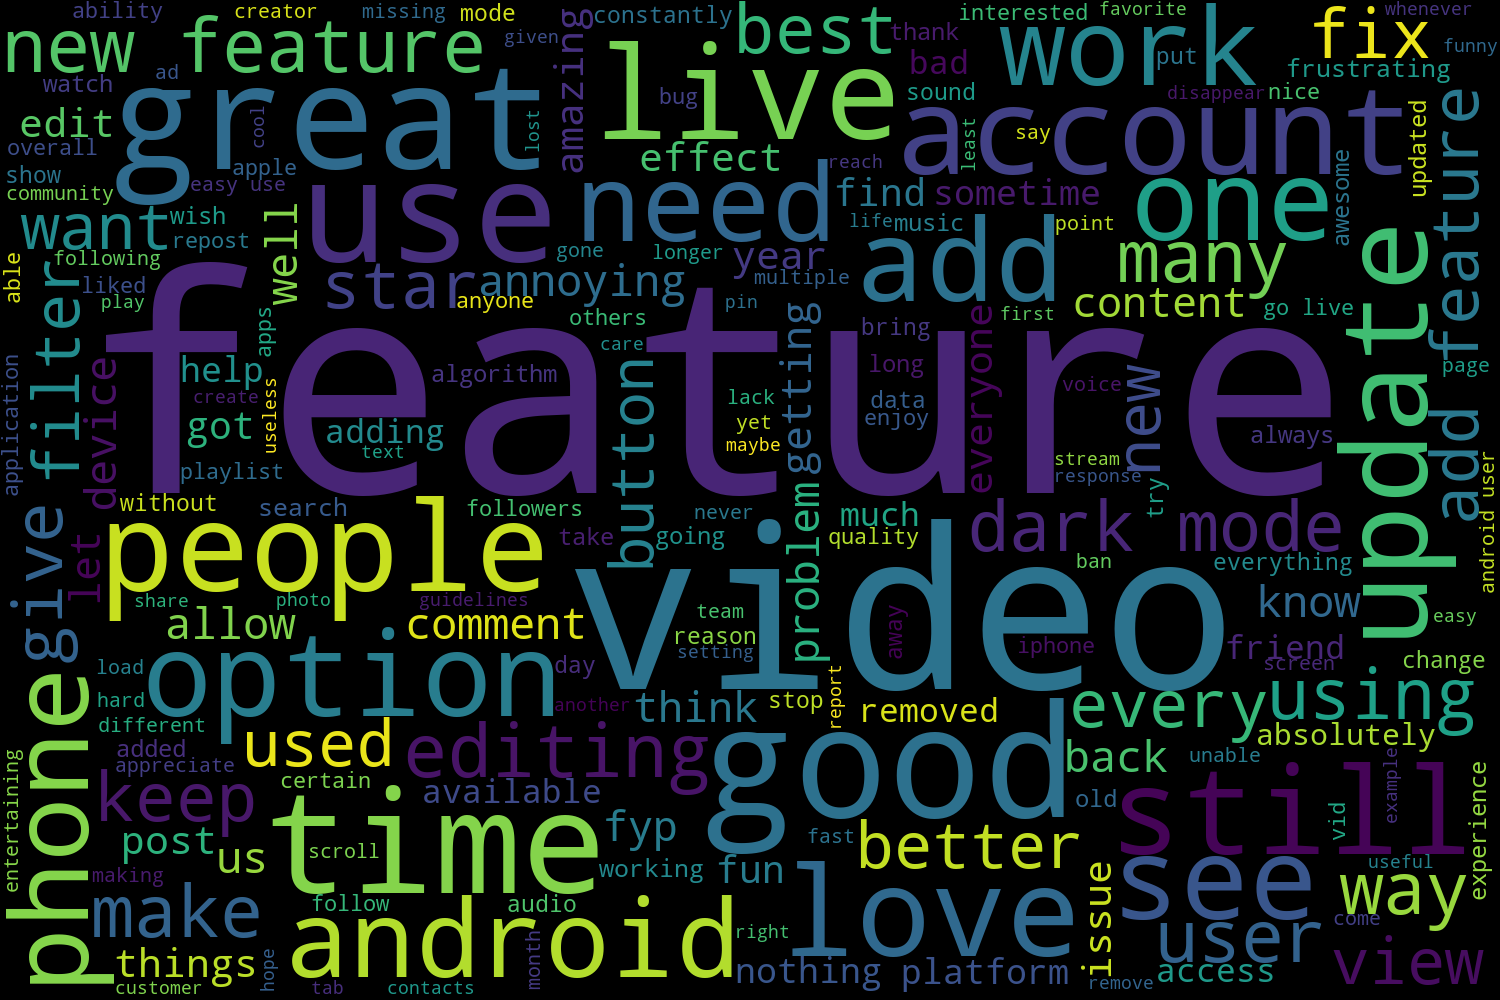

In [32]:
stop=stopwords.words('english')
stop.extend(['even','the','is''still','ha','u','really','literally','dont','please','doe','alway','lot','tiktok','tik','tok',
            'though','stuff','thing','alot','actually','wa','something','uh','ok','ummmmmm','app',
            '𝟙','𝚢𝚘𝚞','𝚢𝚘𝚞','𝚝𝚑𝚒𝚜','𝚜𝚒𝚌𝚔','𝚜','im','m','ve','def','tik tok'])
features_df['preprocessed reviews']=features_df['preprocessed reviews'].apply(lambda list: [word for word in list if word not in stop])

words=[]
for i in features_df['preprocessed reviews']:
    for j in i:
        words.append(j)
keywords=','.join(i for i in words)
wordcloud=WordCloud(width=1500,height=1000)

wordcloud.generate(keywords)
wordcloud.to_image()

In [33]:
vectors=[]
for index, row in features_df.iterrows():
    vectors.append(", ".join(row[1]))

vectorizer=CountVectorizer(analyzer='word',ngram_range=(1,4))

vectorized=vectorizer.fit_transform(vectors)

lda_model=LatentDirichletAllocation(n_components=10,
                                   random_state=10,
                                   evaluate_every=-1,
                                   n_jobs=-1)

lda_output=lda_model.fit_transform(vectorized)

topics=["Topic"+str(i) for i in range(1,lda_model.n_components+1)]

df_topic=pd.DataFrame(np.round(lda_output,2), columns=topics)
main_topic=np.argmax(df_topic.values,axis=1)+1

df_topic['Main Topic of the Document']=main_topic

df_topic

Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  Topic8  Topic9  \
0      0.01    0.01    0.01    0.01    0.01    0.95    0.01    0.01    0.01   
1      0.00    0.00    0.98    0.00    0.00    0.00    0.00    0.00    0.00   
2      0.00    0.00    0.00    0.00    0.99    0.00    0.00    0.00    0.00   
3      0.00    0.00    0.00    0.00    0.00    0.96    0.00    0.00    0.00   
4      0.00    0.00    0.00    0.00    0.00    0.97    0.00    0.00    0.00   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
247    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.99   
248    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
249    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.99    0.00   
250    0.00    0.00    0.00    0.00    0.99    0.00    0.00    0.00    0.00   
251    0.00    0.00    0.00    0.00    0.00    0.00    0.98    0.00    0.00   

     Topic10  Main Topic of the Document  
0       0.01                           6  
1       0.00                           3  
2       0.00                           5  
3       0.00                           6  
4       0.00                           6  
..       ...                         ...  
247     0.00                           9  
248     0.99                          10  
249     0.00                           8  
250     0.00                           5  
251     0.00                           7  

[252 rows x 11 columns]

In [34]:
new_df=pd.merge(features_df,df_topic,left_index=True,right_index=True,how='outer')    
new_df

reviews  \
0    This app is so advanced and has more features ...   
1    They got rid of the discovery feature, which l...   
2    Whenever there's a new update it removes the a...   
3    It's a very heavy wonderful app but it has som...   
4    They have removed the most basic but useful fe...   
..                                                 ...   
247  It's a good app very fun but the updates seem ...   
248  I love the experience but I feel that it has f...   
249  App is very good and entertaining but please f...   
250  App works great and I enjoy using it a lot. I ...   
251  Some features like AI portrait feature doesn't...   

                                  preprocessed reviews  Topic1  Topic2  \
0         [advanced, features, lite, keep, good, work]    0.01    0.01   
1    [got, rid, discovery, feature, lets, find, per...    0.00    0.00   
2    [whenever, new, update, removes, ability, let,...    0.00    0.00   
3    [heavy, wonderful, bad, features, heavy, edit,...    0.00    0.00   
4    [removed, basic, useful, feature, play, pause,...    0.00    0.00   
..                                                 ...     ...     ...   
247  [good, fun, updates, seem, useless, unnecessar...    0.00    0.00   
248  [love, experience, feel, favoritism, go, live,...    0.00    0.00   
249  [good, entertaining, fix, algorithm, like, get...    0.00    0.00   
250  [works, great, enjoy, using, would, appreciate...    0.00    0.00   
251  [features, like, ai, portrait, feature, work, ...    0.00    0.00   

     Topic3  Topic4  Topic5  Topic6  Topic7  Topic8  Topic9  Topic10  \
0      0.01    0.01    0.01    0.95    0.01    0.01    0.01     0.01   
1      0.98    0.00    0.00    0.00    0.00    0.00    0.00     0.00   
2      0.00    0.00    0.99    0.00    0.00    0.00    0.00     0.00   
3      0.00    0.00    0.00    0.96    0.00    0.00    0.00     0.00   
4      0.00    0.00    0.00    0.97    0.00    0.00    0.00     0.00   
..      ...     ...     ...     ...     ...     ...     ...      ...   
247    0.00    0.00    0.00    0.00    0.00    0.00    0.99     0.00   
248    0.00    0.00    0.00    0.00    0.00    0.00    0.00     0.99   
249    0.00    0.00    0.00    0.00    0.00    0.99    0.00     0.00   
250    0.00    0.00    0.99    0.00    0.00    0.00    0.00     0.00   
251    0.00    0.00    0.00    0.00    0.98    0.00    0.00     0.00   

     Main Topic of the Document  
0                             6  
1                             3  
2                             5  
3                             6  
4                             6  
..                          ...  
247                           9  
248                          10  
249                           8  
250                           5  
251                           7  

[252 rows x 13 columns]

In [35]:
keyword_in_topic=np.array(vectorizer.get_feature_names_out()) # keywords name

topic_keywords=[]

# lda_model.components_ : topic-word probability 

for probability in lda_model.components_:
    keywords_array=(-probability).argsort()[:50] # sort the topic weights in descending order (returns array in indices)
    topic_keywords.append(keyword_in_topic.take(keywords_array))
    
for topic in topic_keywords:
    print(topic)

['features' 'feature' 'use' 'videos' 'add' 'best' 'video' 'great' 'way'
 'time' 'like' 'using' 'stop' 'update' 'phone' 'people' 'music' 'annoying'
 'good' 'amazing' 'easy' 'easy use' 'fun' 'users' 'got' 'every' 'new'
 'make' 'try' 'know' 'going' 'take' 'available' 'may' 'however' 'need'
 'noticed' 'ever' 'get' 'also' 'add feature' 'amazing features' 'issue'
 'apps' 'work' 'added' 'apple' 'frustrating' 'na' 'guidelines']
['features' 'feature' 'video' 'still' 'love' 'videos' 'live' 'great' 'new'
 'fix' 'get' 'new features' 'would' 'also' 'add' 'like' 'see' 'better'
 'people' 'watch' 'good' 'make' 'every' 'one' 'problem' 'vid' 'everyone'
 'playlist' 'playlist feature' 'much' 'us' 'add features' 'removed'
 'content' 'many' 'put' 'want' 'used' 'need' 'updated' 'give' 'could'
 'views' 'interested' 'voice' 'star' 'phone' 'fyp' 'overall' 'right']
['features' 'feature' 'good' 'videos' 'mode' 'like' 'search' 'know' 'find'
 'use' 'update' 'new' 'american' 'dark' 'dark mode' 'android' 'add' 'us'
 

In [36]:
df_topic_keywords=pd.DataFrame(topic_keywords)
df_topic_keywords['Topic_Keywords']=df_topic_keywords.values.tolist()
df_topic_keywords['Topic_Number']=df_topic_keywords.index+1
df_topic_keywords=df_topic_keywords[['Topic_Keywords','Topic_Number']]
df_topic_keywords

df_with_topic_keywords=pd.merge(new_df,df_topic_keywords,left_on='Main Topic of the Document',right_on='Topic_Number')
del df_with_topic_keywords['Topic_Number']

df_with_topic_keywords

reviews  \
0    This app is so advanced and has more features ...   
1    It's a very heavy wonderful app but it has som...   
2    They have removed the most basic but useful fe...   
3    There is no praise for TikTok, because all the...   
4    Great app. Been using it since 2019 and I stil...   
..                                                 ...   
247  I can no longer edit videos. It used to work o...   
248  I CAN'T LOG IN TO MY ACCOUNT. The unrecognized...   
249  An app that prioritizes iPhones over Androids ...   
250            It easy and has more beautiful features   
251  I love the experience but I feel that it has f...   

                                  preprocessed reviews  Topic1  Topic2  \
0         [advanced, features, lite, keep, good, work]    0.01    0.01   
1    [heavy, wonderful, bad, features, heavy, edit,...    0.00    0.00   
2    [removed, basic, useful, feature, play, pause,...    0.00    0.00   
3    [praise, features, tito, katha, good, work, or...    0.00    0.00   
4    [great, using, since, 2019, still, use, daily,...    0.00    0.00   
..                                                 ...     ...     ...   
247  [longer, edit, videos, used, work, s22, ultra,...    0.00    0.00   
248  [log, account, unrecognized, device, feature, ...    0.00    0.00   
249  [prioritizes, iphones, androids, always, leave...    0.00    0.00   
250                        [easy, beautiful, features]    0.01    0.01   
251  [love, experience, feel, favoritism, go, live,...    0.00    0.00   

     Topic3  Topic4  Topic5  Topic6  Topic7  Topic8  Topic9  Topic10  \
0      0.01    0.01    0.01    0.95    0.01    0.01    0.01     0.01   
1      0.00    0.00    0.00    0.96    0.00    0.00    0.00     0.00   
2      0.00    0.00    0.00    0.97    0.00    0.00    0.00     0.00   
3      0.00    0.00    0.00    0.98    0.00    0.00    0.00     0.00   
4      0.00    0.00    0.00    0.99    0.00    0.00    0.00     0.00   
..      ...     ...     ...     ...     ...     ...     ...      ...   
247    0.00    0.00    0.00    0.00    0.00    0.00    0.00     0.99   
248    0.00    0.00    0.00    0.00    0.00    0.00    0.00     0.99   
249    0.00    0.00    0.00    0.00    0.00    0.00    0.00     0.99   
250    0.01    0.01    0.01    0.01    0.01    0.01    0.01     0.87   
251    0.00    0.00    0.00    0.00    0.00    0.00    0.00     0.99   

     Main Topic of the Document  \
0                             6   
1                             6   
2                             6   
3                             6   
4                             6   
..                          ...   
247                          10   
248                          10   
249                          10   
250                          10   
251                          10   

                                        Topic_Keywords  
0    [features, feature, great, still, mode, dark, ...  
1    [features, feature, great, still, mode, dark, ...  
2    [features, feature, great, still, mode, dark, ...  
3    [features, feature, great, still, mode, dark, ...  
4    [features, feature, great, still, mode, dark, ...  
..                                                 ...  
247  [features, feature, video, editing, love, edit...  
248  [features, feature, video, editing, love, edit...  
249  [features, feature, video, editing, love, edit...  
250  [features, feature, video, editing, love, edit...  
251  [features, feature, video, editing, love, edit...  

[252 rows x 14 columns]

In [37]:
all=[]
for i in df_with_topic_keywords['Main Topic of the Document'].unique():
    topic=df_with_topic_keywords[df_with_topic_keywords['Main Topic of the Document']==i]
    topic=topic.copy() # no modification on actual df_with_topic_keywords
    
    keyphrases=[]
    
    topic['reviews']=topic['reviews'].str.lower().str.replace('[^\w\s]', ' ',regex=True).str.replace(' +', ' ',regex=True).str.strip()
    
    for j in topic['reviews'].values.tolist():
        r=Rake()
        keyword=r.extract_keywords_from_text(j)
        keyphrase=r.get_ranked_phrases_with_scores()
        
        for phrase in keyphrase:
            if phrase not in keyphrases:
                keyphrases.append(phrase)
                
    keyphrases=pd.DataFrame(keyphrases, columns=['score','key_phrases'])
    keyphrases=keyphrases.sort_values('score',ascending=False)
    keyphrases = keyphrases.drop_duplicates(subset=['key_phrases'])
    keyphrases['Topic_Number']=i
    keyphrases['key_phrases_list']=keyphrases.key_phrases.apply(lambda x: x.split())
    
    bigrams_key=[]
    
    for j in keyphrases.values.tolist():
        key=[]
        bigrams=ngrams(j[3],4)

        for phrase in bigrams:
            key.append(' '.join(phrase))
            
        for word in j[3]:
            key.append(word)
            key.append(lemmatizer.lemmatize(word))
            
        j.remove(j[3])
        j.append(list(set(key)))
        bigrams_key.append(j)
        
    keyphrases=pd.DataFrame(bigrams_key, columns=['score','key_phrases','topic_number','key_phrases_list'])
    # keyphrases df -> key_phrases_list: key words + phrases extracted by RAKE
    
    # df_with_topic_keywords -> CounterVectorizer function
    
    topic_keywords=df_with_topic_keywords['Topic_Keywords'].values.tolist()
    topic_keywords=[item for sublist in topic_keywords for item in sublist]
    topic_keywords=list(set(topic_keywords))
    
    tmp=[]
    
    for key in topic_keywords:
        in_rake=keyphrases.key_phrases_list.apply(lambda x: key in x)
        inrake_keyphrases=keyphrases[in_rake]
                
        if inrake_keyphrases.empty:
            pass
        else:
            for j in inrake_keyphrases[['score','key_phrases','topic_number']].values.tolist():
                if j not in tmp:
                    tmp.append(j)
    
    keyphrases=pd.DataFrame(tmp, columns=['score','key_phrases','topic_number'])
    
    # topic title
    top_key_words=keyphrases[keyphrases.score==keyphrases['score'].max()]
    
    # child terms of a topic title
    child_keywords=keyphrases[keyphrases.score!=keyphrases['score'].max()]
    
    top_key_words=top_key_words.copy()
    top_key_words=top_key_words.groupby(['score','topic_number']).agg({'key_phrases': lambda x: ' /'.join(map(str,x))})
    top_key_words = top_key_words.reset_index()
    top_key_words['parent']=''
    
    child_keywords=child_keywords.copy()
    child_keywords['topic_number']=child_keywords['topic_number']+0.1 # for indication
    child_keywords['parent']=top_key_words['key_phrases'].values.tolist()[0]

    all_topic=pd.concat([top_key_words,child_keywords],sort=False)
    
    for topic in all_topic.to_dict(orient='records'):
        all.append(topic)
        
all_df=pd.DataFrame(all)
all_df=all_df.sort_values('topic_number',ascending=True)
all_df=all_df.loc[all_df['score']>10.0]

all_df.head(30)

score  topic_number  \
680   64.000000           1.0   
780   14.000000           1.1   
779   24.000000           1.1   
778   32.000000           1.1   
704   16.000000           1.1   
703   16.000000           1.1   
702   24.000000           1.1   
698   15.000000           1.1   
697   16.000000           1.1   
696   49.000000           1.1   
681   24.500000           1.1   
733   10.500000           1.1   
729   14.500000           1.1   
728   36.000000           1.1   
844   16.000000           1.1   
804   16.000000           1.1   
811   35.000000           1.1   
816   16.000000           1.1   
812   25.000000           1.1   
813   16.000000           1.1   
865   81.000000           2.0   
1004  21.000000           2.1   
1017  16.000000           2.1   
1018  14.500000           2.1   
973   16.000000           2.1   
981   36.000000           2.1   
982   15.000000           2.1   
983   14.500000           2.1   
1062  16.000000           2.1   
1038  10.333333           2.1   

                                            key_phrases  \
680   year old gets extremely hot system processes f...   
780                             tik tok message feature   
779                 features like creating special room   
778            new features every time scrolling brings   
704                           contacts stop asking also   
703                       stop removing features please   
702                        every ones tiktok stop going   
698                         removing features also make   
697                                make vids ever since   
696     duet feature post recording audio latency makes   
681                         using tiktok around 2 years   
733                                good features revert   
729                          sometimes people add music   
728         new update completely removed someone liked   
844                          fun beneficial time passer   
804                           battery like nothing else   
811                         4 days please give 1 update   
816                         support team since november   
812          update despite numerous troubling shooting   
813                          tiktok app contains update   
865   beta cleared cache cleared data uninstalled re...   
1004                         every five scrolls vid vid   
1017                          hello tiktok support team   
1018                         tikttoks overall great app   
973                        video autoplay feature needs   
981                   1 hour adding new features thanks   
982                           dont see playlist feature   
983                          donot see playlist feature   
1062                     promote problematic things huh   
1038                                       vid live vid   

                                                 parent  
680                                                      
780   year old gets extremely hot system processes f...  
779   year old gets extremely hot system processes f...  
778   year old gets extremely hot system processes f...  
704   year old gets extremely hot system processes f...  
703   year old gets extremely hot system processes f...  
702   year old gets extremely hot system processes f...  
698   year old gets extremely hot system processes f...  
697   year old gets extremely hot system processes f...  
696   year old gets extremely hot system processes f...  
681   year old gets extremely hot system processes f...  
733   year old gets extremely hot system processes f...  
729   year old gets extremely hot system processes f...  
728   year old gets extremely hot system processes f...  
844   year old gets extremely hot system processes f...  
804   year old gets extremely hot system processes f...  
811   year old gets extremely hot system processes f...  
816   year old gets extremely hot system processes f...  
812   year old gets extremely hot system processes f..

In [38]:
fig=graph.Figure(graph.Sunburst(
    labels=all_df['key_phrases'].values.tolist(),
    parents=all_df['parent'].values.tolist(),
    values=all_df['score'].values.tolist()
))

fig.show()